In [ ]:
pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 5.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=058df2dbf43a0f8e2592eba82fef1e599a89ea1b0b3cefc06c93e9b6fd09a1a2
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#Fuzzy inputs and outputs

In [ ]:
temperature = ctrl.Antecedent(np.arange(0, 46, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 25, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 1601, 1), 'fan_speed')

#Fuzzy Sets and their membership functions

14


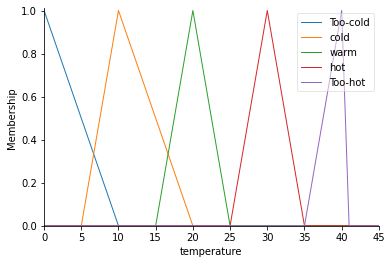

In [ ]:
temperature['Too-cold'] = fuzz.trimf(temperature.universe, [0, 0, 10]) #or fuzz.trapmf for trapezoidale membership function
temperature['cold'] = fuzz.trimf(temperature.universe, [5, 10, 20])
temperature['warm'] = fuzz.trimf(temperature.universe, [15, 20, 25])
temperature['hot'] = fuzz.trimf(temperature.universe, [25, 30, 35])
temperature['Too-hot'] = fuzz.trimf(temperature.universe, [35, 40, 40])

temperature.view()
x = input()

22


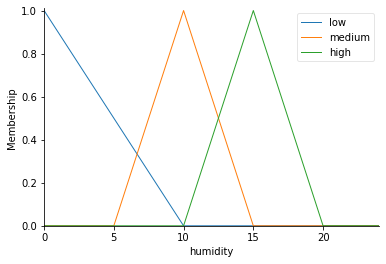

In [ ]:
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 10])
humidity['medium'] = fuzz.trimf(humidity.universe, [5, 10, 15])
humidity['high'] = fuzz.trimf(humidity.universe, [10, 15, 20])

humidity.view()
y = input()

In [ ]:
print(humidity.universe)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


[   0    1    2 ... 1598 1599 1600]


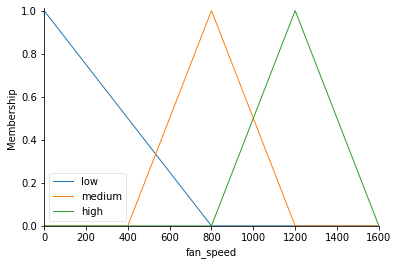

In [ ]:
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 800])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [400, 800, 1200])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [800, 1200, 1600])

fan_speed.view()
print(fan_speed.universe)

In [ ]:
rule1a = ctrl.Rule(temperature['hot'] | humidity['low'], fan_speed['high'])
rule1b = ctrl.Rule(temperature['hot'] | humidity['high'], fan_speed['medium'])

rule2 = ctrl.Rule(humidity['medium'], fan_speed['medium'])

rule3a = ctrl.Rule(temperature['Too-hot'] | humidity['low'], fan_speed['high'])
rule3b = ctrl.Rule(temperature['Too-hot'] |
                   humidity['high'], fan_speed['medium'])

rule4a = ctrl.Rule(temperature['cold'] | humidity['low'], fan_speed['low'])
rule4b = ctrl.Rule(temperature['cold'] | humidity['high'], fan_speed['low'])

rule5a = ctrl.Rule(temperature['warm'] | humidity['low'], fan_speed['medium'])
rule5b = ctrl.Rule(temperature['warm'] | humidity['high'], fan_speed['low'])

rule6a = ctrl.Rule(temperature['Too-cold'] | humidity['low'], fan_speed['low'])
rule6b = ctrl.Rule(temperature['Too-cold'] |
                   humidity['high'], fan_speed['low'])

In [ ]:
fan_speed_ctrl = ctrl.ControlSystem(
    [rule1a, rule1b, rule2, rule3a, rule3b, rule4a, rule4b, rule5a, rule5b, rule6a, rule6b])
speed = ctrl.ControlSystemSimulation(fan_speed_ctrl)

#Inputs values

In [ ]:
speed.input['temperature'] = int(x)
speed.input['humidity'] = int(y)

# Decision

297.1428571428569


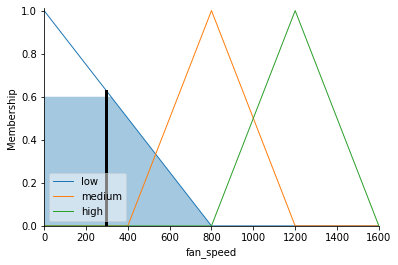

In [ ]:
speed.compute()

print(speed.output['fan_speed'] )
fan_speed.view(sim=speed)